In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

data = pd.read_csv('Airline_data.csv')
milesFlown = data['Miles flown [100 mln miles]'].values

data

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [24]:
data.describe()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
count,10.00000,10.000000,10.000000,10.000000
mean,1980.50000,23.800000,691.900000,5715.800000
std,3.02765,4.709329,252.389228,1117.767795
min,1976.00000,16.000000,223.000000,3863.000000
25%,1978.25000,21.250000,570.500000,5140.500000
50%,1980.50000,23.000000,759.000000,5845.500000
75%,1982.75000,25.750000,812.750000,6175.500000
max,1985.00000,31.000000,1066.000000,7433.000000


In [25]:

sm = CmdStanModel(stan_file="./priorModel.stan")

res = sm.sample(
    data={
        'N': len(milesFlown),
        'milesFlown': milesFlown,
        'alpha': -1,
        'theta': 0.0006
    },
    iter_sampling=1000,
    refresh=1000,
    iter_warmup=0,
    chains=1,
    seed=29042020,
    fixed_param=True
)

# Generate posterior predictive samples
samples = res.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [26]:
samples

,lp__,accept_stat__,alpha,theta,lambda[1],lambda[2],lambda[3],lambda[4],lambda[5],lambda[6],...,y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10]
0,0.0,0.0,3.31245,-0.000002,27.21710,27.19060,27.14660,27.11910,27.09900,27.08580,...,29.0,22.0,34.0,25.0,34.0,31.0,24.0,28.0,35.0,29.0
1,0.0,0.0,2.96547,-0.000014,18.40920,18.29990,18.11960,18.00790,17.92640,17.87300,...,18.0,18.0,18.0,16.0,12.0,19.0,12.0,17.0,21.0,13.0
2,0.0,0.0,2.67968,-0.000010,14.01600,13.95360,13.85030,13.78620,13.73930,13.70860,...,22.0,18.0,22.0,10.0,15.0,6.0,15.0,11.0,10.0,11.0
3,0.0,0.0,2.40666,0.000007,11.38370,11.41660,11.47160,11.50600,11.53140,11.54810,...,13.0,11.0,11.0,10.0,12.0,11.0,9.0,12.0,12.0,13.0
4,0.0,0.0,2.47840,-0.000009,11.52190,11.47750,11.40390,11.35820,11.32490,11.30290,...,15.0,16.0,10.0,9.0,16.0,14.0,14.0,13.0,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,2.24204,-0.000010,9.05783,9.01855,8.95359,8.91327,8.88380,8.86448,...,10.0,12.0,9.0,12.0,11.0,7.0,8.0,10.0,7.0,13.0
996,0.0,0.0,2.18283,-0.000029,7.91958,7.81855,7.65332,7.55191,7.47839,7.43042,...,6.0,2.0,7.0,6.0,10.0,15.0,8.0,8.0,6.0,8.0
997,0.0,0.0,2.49630,0.000008,12.53370,12.57930,12.65560,12.70350,12.73870,12.76190,...,12.0,9.0,9.0,15.0,15.0,13.0,11.0,13.0,12.0,6.0
998,0.0,0.0,2.59842,-0.000021,12.37460,12.25930,12.06980,11.95290,11.86790,11.81240,...,11.0,8.0,5.0,16.0,15.0,9.0,7.0,7.0,12.0,13.0


In [64]:
preds = samples.loc[:,"y[1]":"y[10]"].values
preds

array([[29., 22., 34., ..., 28., 35., 29.],
       [18., 18., 18., ..., 17., 21., 13.],
       [22., 18., 22., ..., 11., 10., 11.],
       ...,
       [12.,  9.,  9., ..., 13., 12.,  6.],
       [11.,  8.,  5., ...,  7., 12., 13.],
       [20., 15., 17., ..., 23., 15., 22.]])

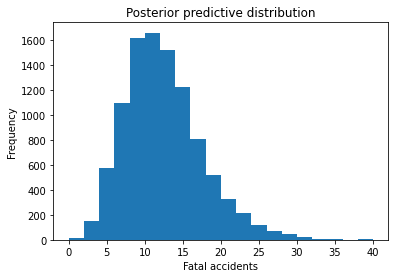

In [54]:
# Plot posterior predictive distribution
plt.hist(preds.flatten(), bins=20)
plt.title('Posterior predictive distribution')
plt.xlabel('Fatal accidents')
plt.ylabel('Frequency')
plt.show()

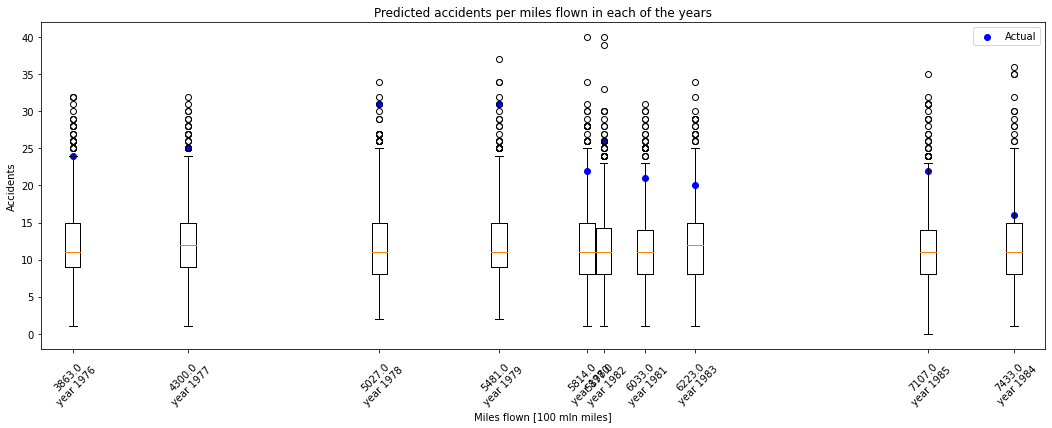

In [99]:
plt.figure(figsize=(18, 6))
plt.scatter(milesFlown, data["Fatal accidents"].values, c="b", label="Actual")
plt.boxplot(preds, positions=milesFlown, widths=[60 for _ in milesFlown])

plt.title("Predicted accidents per miles flown in each of the years")
plt.xlabel("Miles flown [100 mln miles]")
plt.ylabel("Accidents")
plt.xticks(milesFlown, list(map(lambda tup: f"{tup[1]}\nyear {data['Year'][tup[0]]}", enumerate(milesFlown))), rotation = 45)
plt.xlim(milesFlown.min() - 120, milesFlown.max() + 120)

plt.legend()

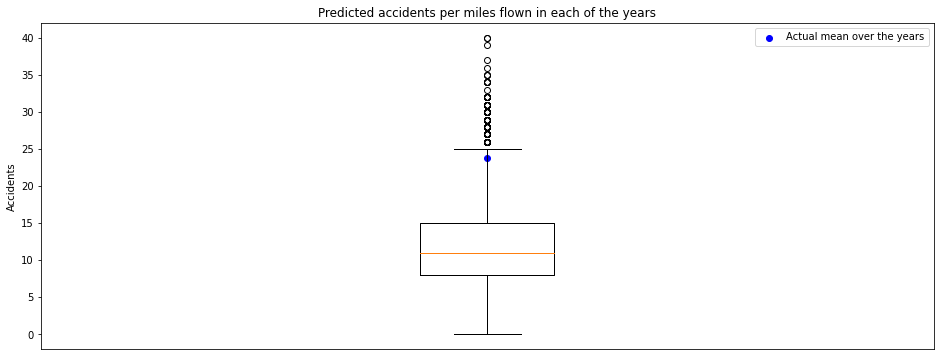

In [93]:
plt.figure(figsize=(16, 6))
plt.scatter(0, data["Fatal accidents"].values.mean(), c="b", label="Actual mean over the years")
plt.boxplot(preds.flatten(), positions=[0])

plt.title("Predicted accidents per miles flown in each of the years")
plt.ylabel("Accidents")
plt.xticks([]) # turn off

plt.legend()